# Merging Tweet CSVs for NLP in Stock Market Manipulation Detection

In [9]:
import os
import pandas as pd
from tqdm import tqdm

current_dir = os.getcwd()

while 'Stock-Market-Manipulation-Detection-via-Tweet-Analysis' not in os.path.basename(current_dir):
    current_dir = os.path.dirname(current_dir)

main_directory = current_dir

folder_path = os.path.join(main_directory, 'data', 'raw', 'tweets_split_data')

print(f"Constructed folder path: {folder_path}")

if os.path.exists(folder_path):
    print(f"Successfully navigated to: {folder_path}")
    
    dfs = []
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    for filename in tqdm(csv_files, desc="Merging CSV files"):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path, on_bad_lines='skip')  # Skip bad lines
            # Extract the stock name from the filename (remove '.csv' extension)
            stockname = os.path.splitext(filename)[0]
            # Add a new column 'stockname' with the extracted stock name
            df['stockname'] = stockname
            dfs.append(df)
        except pd.errors.ParserError as e:
            print(f"Error parsing file {filename}: {e}")
            continue

    # Concatenate all DataFrames into one
    merged_df = pd.concat(dfs, ignore_index=True)

    # Define the path where the merged CSV will be saved
    merged_file_path = os.path.join(main_directory, 'data', 'tweets_merged_data.csv')

    # Save the merged DataFrame to a CSV file
    merged_df.to_csv(merged_file_path, index=False)

    print(f"Merged CSV file saved to: {merged_file_path}")
else:
    print("Error: The folder path does not exist.")


Constructed folder path: C:\Users\Dell\Desktop\Stock-Market-Manipulation-Detection-via-Tweet-Analysis\data\raw\tweets_split_data
Successfully navigated to: C:\Users\Dell\Desktop\Stock-Market-Manipulation-Detection-via-Tweet-Analysis\data\raw\tweets_split_data


Merging CSV files: 100%|███████████████████████████████████████████████████████████████| 50/50 [00:09<00:00,  5.21it/s]


Merged CSV file saved to: C:\Users\Dell\Desktop\Stock-Market-Manipulation-Detection-via-Tweet-Analysis\data\tweets_merged_data.csv


# Data Wrangling: Cleaning and Preparing Twitter Data for Stock Market Manipulation Detection

In [51]:
import pandas as pd
data=pd.read_csv("../../data/tweets_merged_data.csv")
data.head()

,Date,Tweet Count,Username,Text,Created At,Retweets,Likes,stockname,Date Collected,Tweet_count
0,2022-01-04,1,ms.valentines ₍ᵔ·͈༝·͈ᵔ₎,ไม่พูดไม่ได้ adidas ลดเยอะมากก ทั้งรุ่นคลาสสิก...,Tue Jan 04 13:51:12 +0000 2022,209.0,270.0,ADANIENT,NaN,NaN
1,2022-01-04,2,RubenTrades,WHAT A DAAAAAY!\n \nTraded with some awesome t...,Tue Jan 04 23:54:39 +0000 2022,2.0,72.0,ADANIENT,NaN,NaN
2,2022-01-04,3,Breakout Charts ®️,Stocks to Watch out\n\n1. Hind Copper\n2. Fluo...,Tue Jan 04 14:27:06 +0000 2022,40.0,424.0,ADANIENT,NaN,NaN
3,2022-01-04,4,mignolet,"옵션 Implied Volatility을 보면, 곧 큰 변동성이 나타날 가능성이 높...",Tue Jan 04 01:01:24 +0000 2022,23.0,200.0,ADANIENT,NaN,NaN
4,2022-01-04,5,レイチェル,おはようございます。主要3指数はまちまちの展開。ダウは2日連続での最高値更新。一方ナスダック...,Tue Jan 04 21:45:57 +0000 2022,40.0,486.0,ADANIENT,NaN,NaN


In [32]:
data.columns

Index(['Date', 'Tweet Count', 'Username', 'Text', 'Created At', 'Retweets',
       'Likes', 'stockname', 'Date Collected', 'Tweet_count'],
      dtype='object')

# Dataset Variables

| Variable        | Description                                                                                                                                       |
|-----------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **Date**        | The date of the tweet. This field may contain mixed data types and might require cleaning to ensure consistency (e.g., standard date format).      |
| **Tweet Count** | The count of tweets. This field may have mixed data types; consider converting all entries to integers for accurate analysis.                      |
| **Username**    | The Twitter username of the author who posted the tweet.                                                                                          |
| **Text**        | The content of the tweet.                                                                                                                         |
| **Created At**  | The exact timestamp when the tweet was created. Ensure this is in a consistent datetime format for time-based analyses.                            |
| **Retweets**    | The number of times the tweet has been retweeted.                                                                                                 |
| **Likes**       | The number of likes the tweet has received.                                                                                                       |
| **Stockname**   | The name of the stock being discussed, extracted from the filename (e.g., if the file is `abc.csv`, the stockname is `abc`).                       |
| **Date Collected** | The date when the data was collected. This field is mostly empty and might be dropped unless you plan to fill or utilize it in your analysis.   |
| **Tweet_count** | Appears to be a duplicate of "Tweet Count" but is mostly empty. Consider consolidating this with "Tweet Count" or dropping it if unnecessary.      |


### Plot missing values as a heatmap

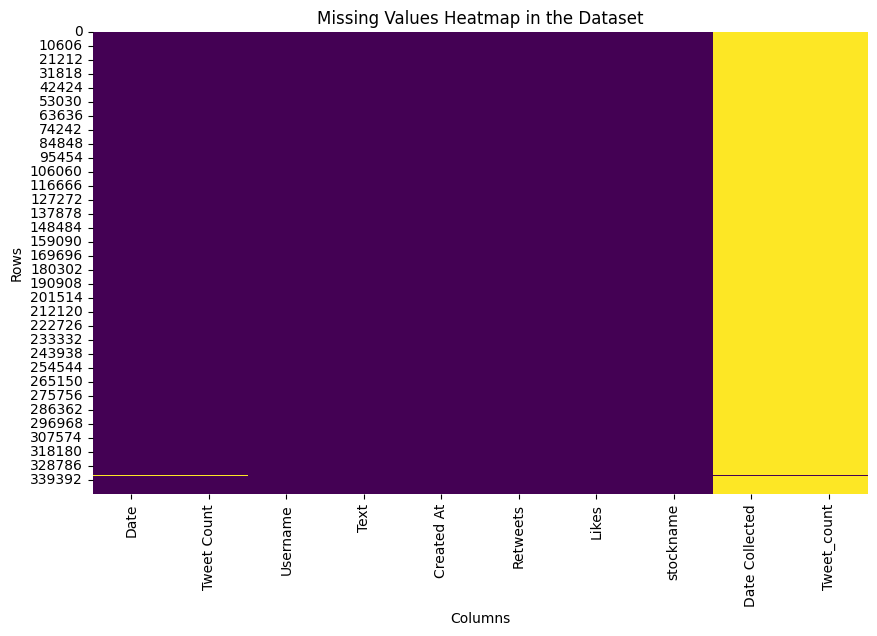

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

-The columns "Date Collected" and "Tweet_count" has been added again by mistake by script so they can be dropped
-Other columns such as "Date", "Retweets", "Likes", and "Tweet Count" have only a small fraction of missing data, which is manageable.

## Visualizing duplicate rows count

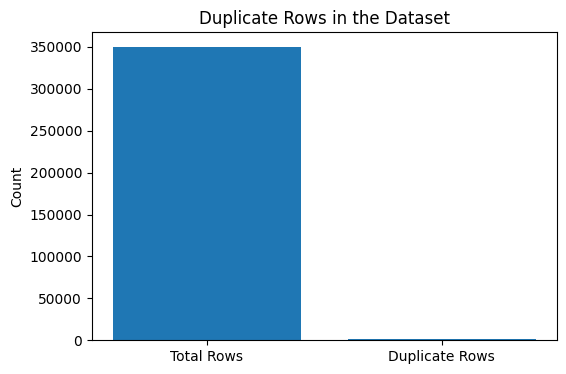

Duplicate Rows: 998
Total Rows: 349997


In [34]:
plt.figure(figsize=(6, 4))
duplicate_row_count = data.duplicated().sum()
plt.bar(['Total Rows', 'Duplicate Rows'], [len(data), duplicate_row_count])
plt.title('Duplicate Rows in the Dataset')
plt.ylabel('Count')
plt.show()
print("Duplicate Rows:",duplicate_row_count)
print("Total Rows:",len(data))

-Not Major dupicated rows it can be handled

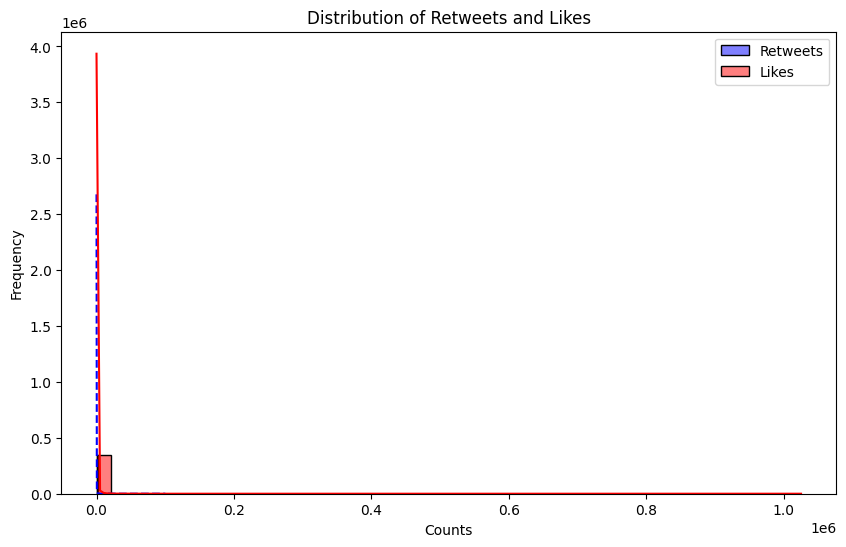

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure for the combined distribution plot
plt.figure(figsize=(10, 6))

# Plot distribution for Retweets with KDE line
sns.histplot(data['Retweets'].dropna(), bins=50, kde=True, color='blue', label='Retweets', line_kws={'linestyle':'--'})

# Plot distribution for Likes with KDE line
sns.histplot(data['Likes'].dropna(), bins=50, kde=True, color='red', label='Likes', line_kws={'linestyle':'-'})

# Adding the title and labels
plt.title('Distribution of Retweets and Likes')
plt.xlabel('Counts')
plt.ylabel('Frequency')

# Add a legend to distinguish Retweets and Likes
plt.legend()

# Show the plot
plt.show()

-Both Retweets and Likes are right-skewed, meaning that most tweets receive very low engagement, while a small number of tweets receive a disproportionately high number of retweets and likes.


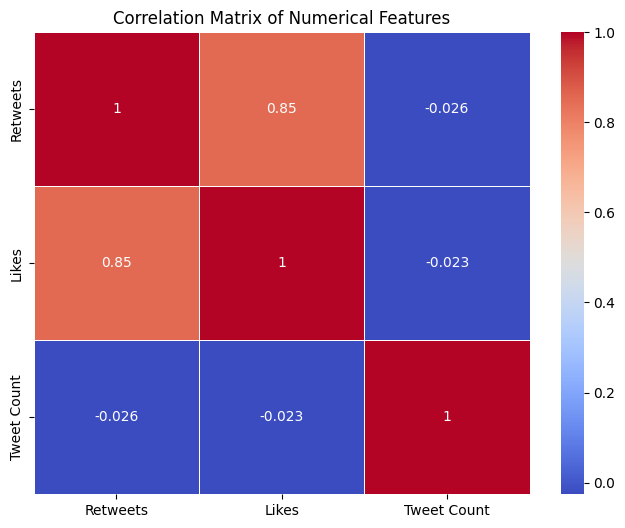

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Tweet Count' to numeric, coercing errors to NaN
data['Tweet Count'] = pd.to_numeric(data['Tweet Count'], errors='coerce')

# Now create the correlation heatmap for numeric columns
numerical_cols = ['Retweets', 'Likes', 'Tweet Count']

# Drop rows where all the columns are NaN (to avoid issues during correlation)
clean_data = data[numerical_cols].dropna()

# Correlation matrix
corr_matrix = clean_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


-Both Retweets and Likes are right-skewed, meaning that most tweets receive very low engagement, while a small number of tweets receive a disproportionately high number of retweets and likes.


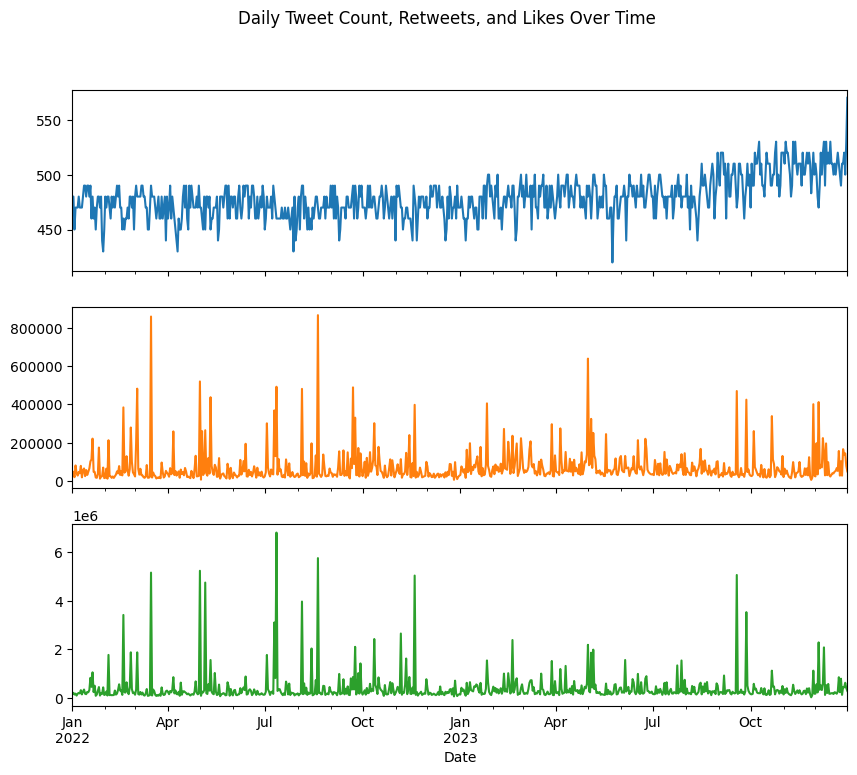

In [37]:
# Set 'Date' as the index for time-series analysis (ensure 'Date' column is datetime format)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('Date', inplace=True)

# Resample data by day and aggregate
daily_data = data.resample('D').agg({'Tweet Count': 'count', 'Retweets': 'sum', 'Likes': 'sum'})

# Plot time series for Tweet Count, Retweets, and Likes
daily_data.plot(subplots=True, layout=(3, 1), figsize=(10, 8), sharex=True, legend=False)
plt.suptitle('Daily Tweet Count, Retweets, and Likes Over Time')
plt.show()

-There are noticeable spikes in activity (retweets, likes, and tweet counts) on certain days. These spikes could correlate with market events or attempts to manipulate stock prices through coordinated tweet campaigns.

-Such peaks can indicate periods when market manipulation might be happening, especially if tweet activity is disproportionate compared to normal engagement levels.


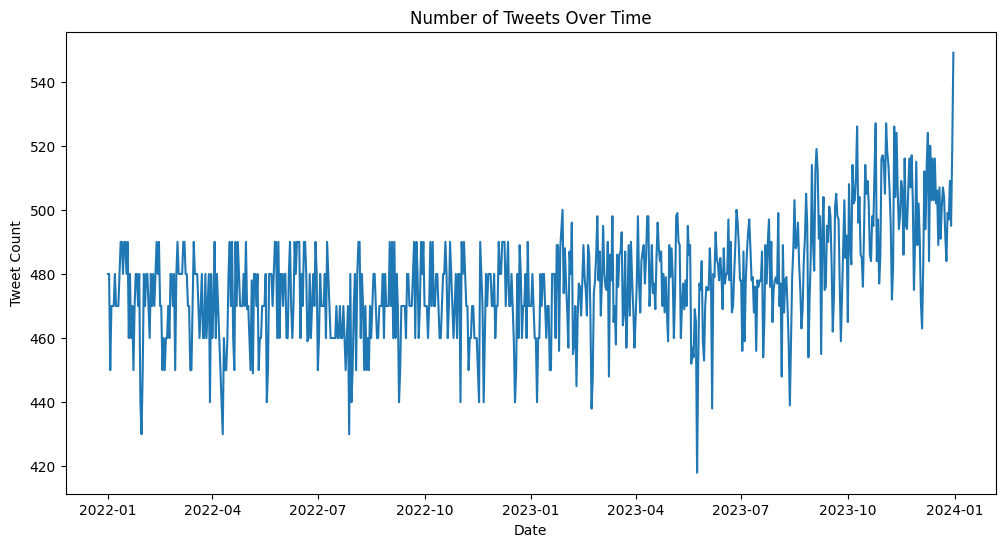

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')

# Group by date and count tweets
tweets_per_day = merged_df.groupby('Date').size().reset_index(name='tweet_count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=tweets_per_day, x='Date', y='tweet_count')
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.show()

-the number of tweets are increasing day by day meaning tweets can have higher imapact on stocks

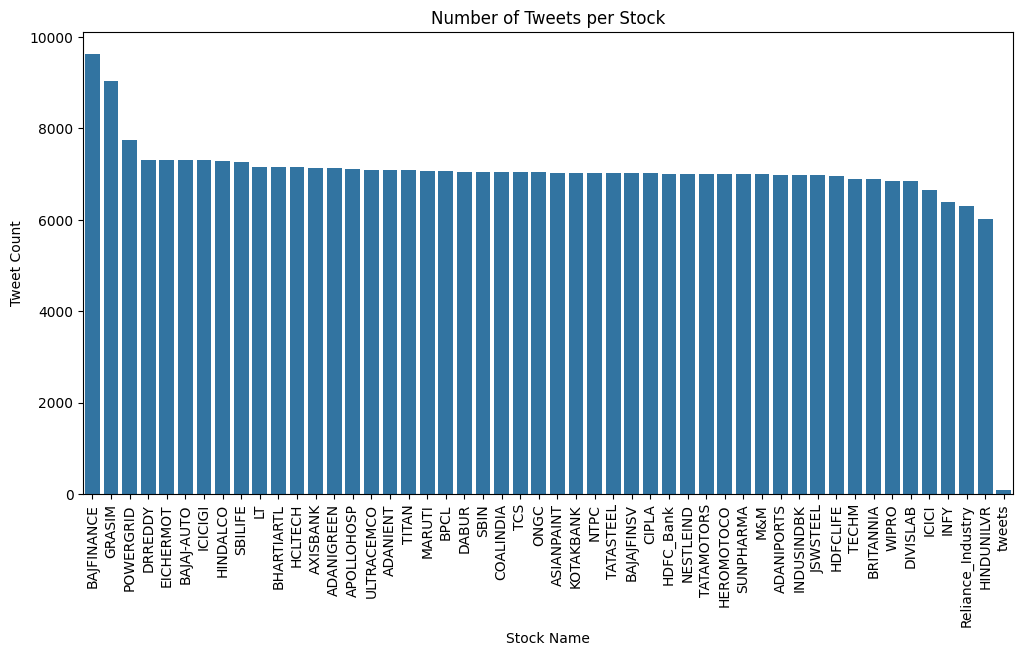

In [39]:
# Group by 'stockname' and count tweets
tweets_per_stock = merged_df.groupby('stockname').size().reset_index(name='tweet_count')

# Sort values
tweets_per_stock = tweets_per_stock.sort_values(by='tweet_count', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_per_stock, x='stockname', y='tweet_count')
plt.xticks(rotation=90)
plt.title('Number of Tweets per Stock')
plt.xlabel('Stock Name')
plt.ylabel('Tweet Count')
plt.show()


High Activity for Certain Stocks: The plot shows that Bajaj Finance (BAJAJFINANCE), Grasim (GRASIM), and Power Grid Corporation (POWERGRID) are among the stocks with the highest number of tweets. This could indicate that these stocks are currently popular in discussions, possibly due to market-moving news or events.

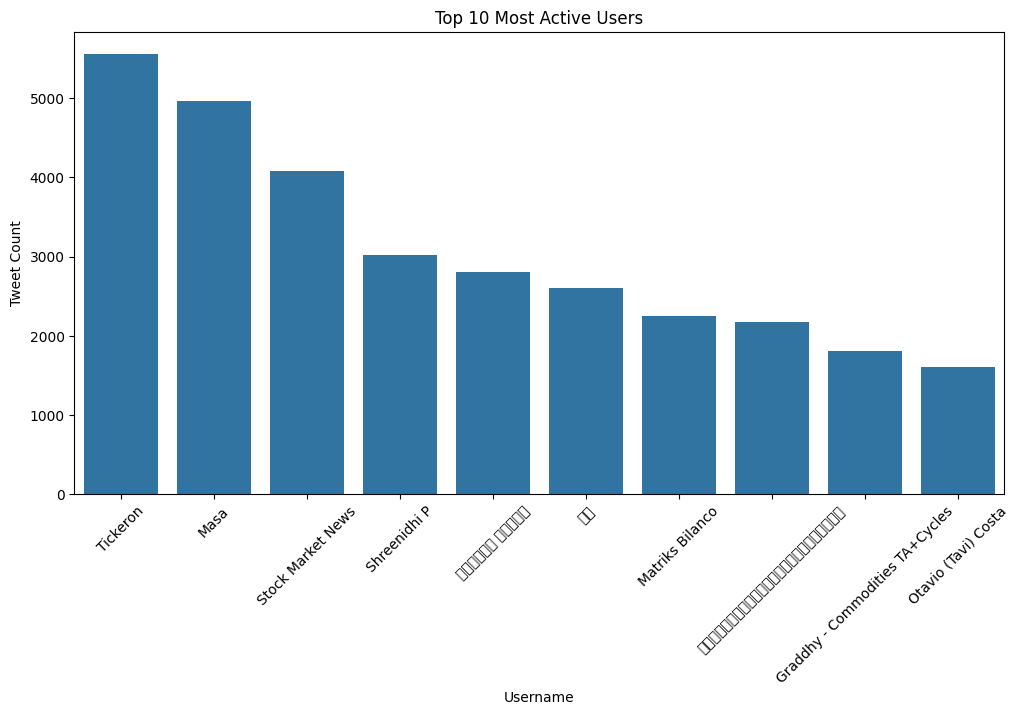

In [40]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore all warnings
warnings.filterwarnings("ignore")

# Assuming merged_df is already defined
# Group by 'Username' and count tweets
tweets_per_user = merged_df.groupby('Username').size().reset_index(name='tweet_count')

# Sort and get top 10 users
top_users = tweets_per_user.sort_values(by='tweet_count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_users, x='Username', y='tweet_count')
plt.xticks(rotation=45)
plt.title('Top 10 Most Active Users')
plt.xlabel('Username')
plt.ylabel('Tweet Count')
plt.show()

-as these users are tweeting way much they can create imapact and might manupulate market

# Data Cleaning

In [52]:
# Drop columns with too many missing values if not relevant
data.drop(columns=['Date Collected', 'Tweet_count'], errors='ignore', inplace=True)

# Drop rows with missing essential data (e.g., 'Text', 'Retweets', 'Likes')
data.dropna(subset=['Text', 'Retweets', 'Likes'], inplace=True)


In [54]:
# Check the current data types
print("Before conversion:")
print(data.dtypes)

# Step 1: Convert Date columns (if the actual column is named 'Date' or 'Created At')
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
elif 'Created At' in data.columns:
    data['Created At'] = pd.to_datetime(data['Created At'], errors='coerce')

# Step 2: Convert numerical columns (Retweets, Likes, and any other numerical columns)
numeric_columns = ['Retweets', 'Likes', 'Tweet Count']  # Add more columns if necessary
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Step 3: Convert categorical columns (if applicable)
# Example: 'Username' and 'stockname' as categorical columns
categorical_columns = ['Username', 'stockname']  # Add more if applicable
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].astype('category')

# Final check on data types
print("After conversion:")
print(data.dtypes)

Before conversion:
Date            object
Tweet Count     object
Username        object
Text            object
Created At      object
Retweets       float64
Likes          float64
stockname       object
dtype: object
After conversion:
Date           datetime64[ns]
Tweet Count           float64
Username             category
Text                   object
Created At             object
Retweets              float64
Likes                 float64
stockname            category
dtype: object
